<a href="https://colab.research.google.com/github/MargaretGuy/UK-health-and-happiness/blob/main/Testing_for_correlations_between_air_quality_water_pollution_and_different_health_indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing health dataset from BigQuery

In [5]:

import pandas as pd
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()

# Set your Google Cloud project ID
PROJECT_ID = "uk-health-happiness"

# Initialize a BigQuery client
client = bigquery.Client(project=PROJECT_ID)

# Define the full table ID
TABLE_ID = "uk-health-happiness.cleaned_data.Health_more_factors_31"

# Query to select all data from the table
query = f"SELECT * FROM `{TABLE_ID}`"

# Run the query and store results in a Pandas DataFrame
df = client.query(query).to_dataframe()

# Display the first few rows of the dataset
df.head()


,Region,Indicator_grouping_name,avg_min_temp_c,avg_max_temp_c,total_rain_mm,avg_temp_c,avg_wind_speed_kmh,avg_wind_gust_speed_kmh,avg_dominant_wind_direction,Health_Latitude,...,nb_flats,nb_flats_with_gardens,avg_garden_size_flats,nb_houses,nb_houses_with_gardens,avg_garden_size_houses,AirQuality,WaterPollution,average_dogs_per_household,average_cats_per_household
0,Barking and Dagenham,Healthy eating,7.961096,14.256712,604.2,11.128493,80.332274,161.141918,199.873973,51.55,...,24731,13394.81,194.6,51230,50805,164.79,NaN,NaN,NaN,NaN
1,Barking and Dagenham,Job-related training,7.961096,14.256712,604.2,11.128493,80.332274,161.141918,199.873973,51.55,...,24731,13394.81,194.6,51230,50805,164.79,NaN,NaN,NaN,NaN
2,Barking and Dagenham,Behavioural risk factors,7.961096,14.256712,604.2,11.128493,80.332274,161.141918,199.873973,51.55,...,24731,13394.81,194.6,51230,50805,164.79,NaN,NaN,NaN,NaN
3,Barking and Dagenham,Diabetes,7.961096,14.256712,604.2,11.128493,80.332274,161.141918,199.873973,51.55,...,24731,13394.81,194.6,51230,50805,164.79,NaN,NaN,NaN,NaN
4,Barking and Dagenham,Local enviroment,7.961096,14.256712,604.2,11.128493,80.332274,161.141918,199.873973,51.55,...,24731,13394.81,194.6,51230,50805,164.79,NaN,NaN,NaN,NaN


# Health indicator - Healthy places


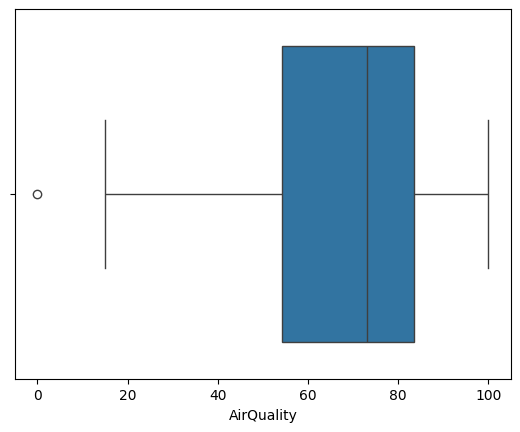

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#creating df for healthy places
df_healthy_places = df[(df.Indicator_grouping_name == "Healthy Places")]

#create boxplot for air quality
sns.boxplot(x=df_healthy_places['AirQuality'])
plt.show()


In [10]:
#drop the outlier
df_healthy_places = df_healthy_places.drop(df_healthy_places[df_healthy_places['AirQuality'] == 0].index)

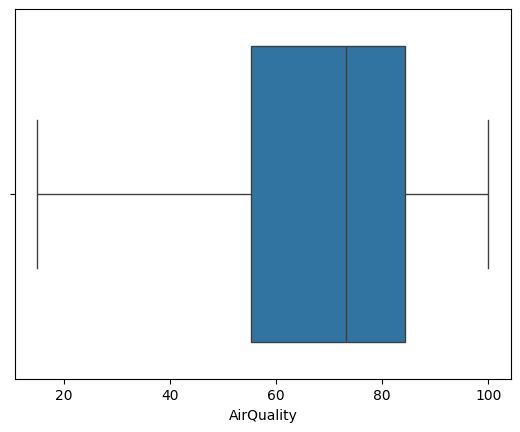

In [24]:
#create boxplot for water pollution
sns.boxplot(x=df_healthy_places['AirQuality'])
plt.show()

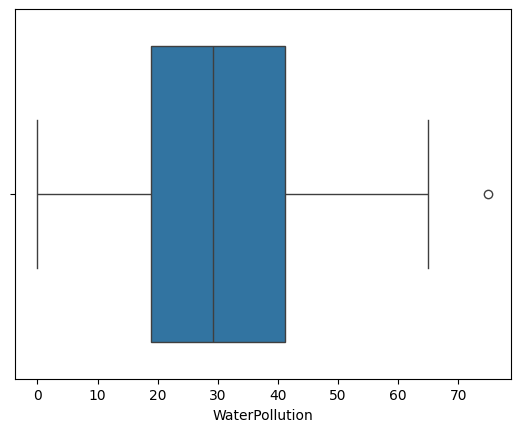

In [25]:
#create boxplot for water pollution
sns.boxplot(x=df_healthy_places['WaterPollution'])
plt.show()

In [26]:
#drop the outlier
df_healthy_places = df_healthy_places.drop(df_healthy_places[df_healthy_places['WaterPollution'] > 70].index)

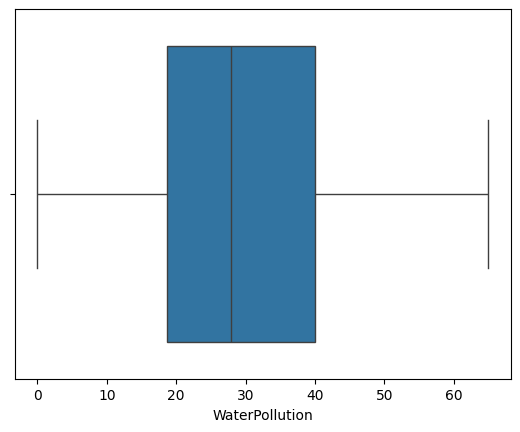

In [27]:
#create boxplot for water pollution
sns.boxplot(x=df_healthy_places['WaterPollution'])
plt.show()

<Axes: >

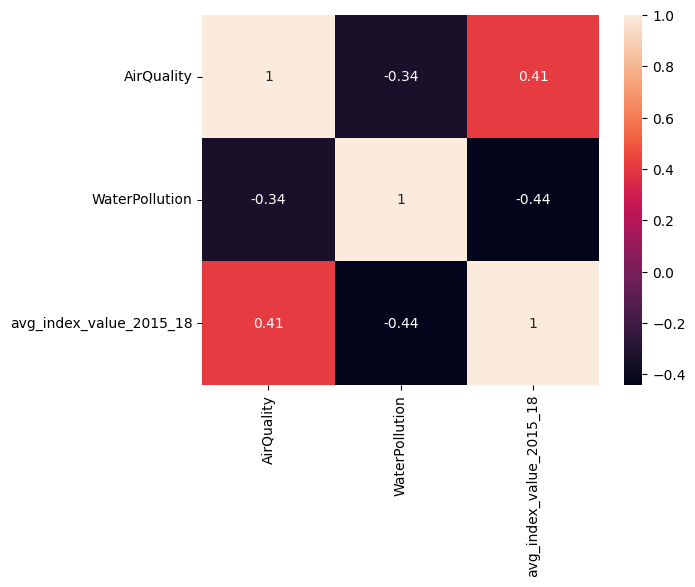

In [28]:
import seaborn as sns

#create df_correlation
df_correlation=df_healthy_places[['AirQuality', 'WaterPollution', 'avg_index_value_2015_18']]

# display correlation matrix
sns.heatmap( df_correlation.corr(), annot=True)

# Health indicator - Household overcrowding

In [16]:
#creating df for household overcrowding
df_household_overcrowding = df[(df.Indicator_grouping_name == "Household overcrowding")]

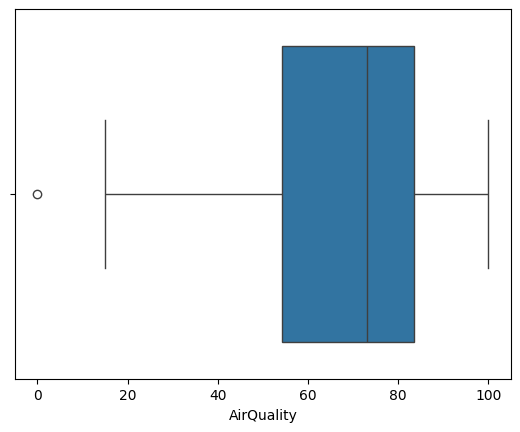

In [18]:
#create boxplot for air quality
sns.boxplot(x=df_household_overcrowding['AirQuality'])
plt.show()

In [ ]:
#drop the outlier
df_household_overcrowding = df_household_overcrowding .drop(df_household_overcrowding [df_household_overcrowding ['AirQuality'] == 0].index)

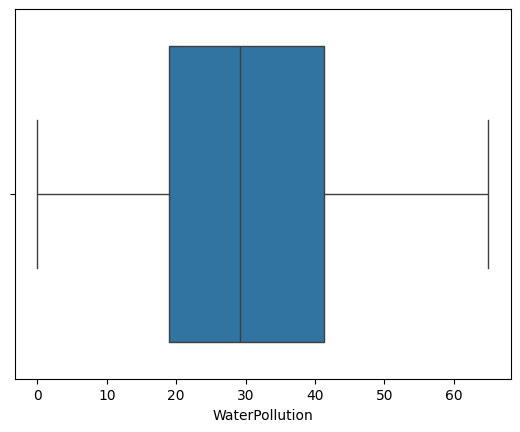

In [52]:
#create boxplot for water pollution
sns.boxplot(x=df_household_overcrowding['WaterPollution'])
plt.show()

<Axes: >

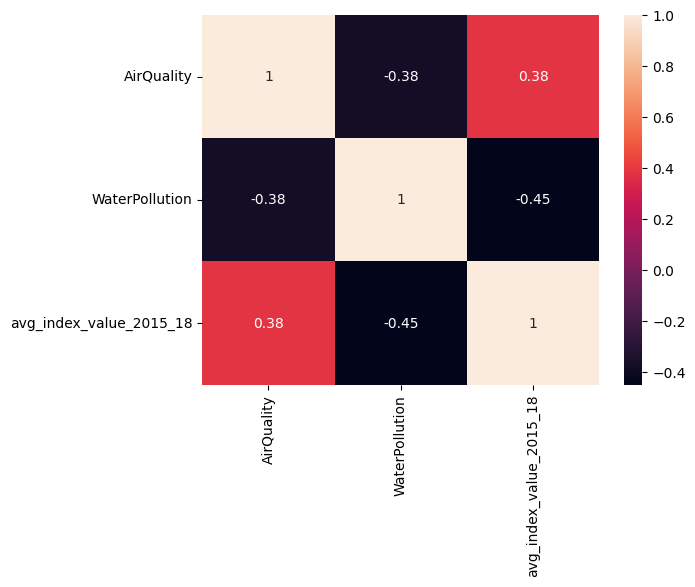

In [30]:
#create df_correlation
df_correlation=df_household_overcrowding[['AirQuality', 'WaterPollution', 'avg_index_value_2015_18']]

# display correlation matrix
sns.heatmap( df_correlation.corr(), annot=True)

# Health indicator - Private outdoor space

In [31]:
#creating df for household overcrowding
df_private_outdoor_space = df[(df.Indicator_grouping_name == "Private outdoor space")]

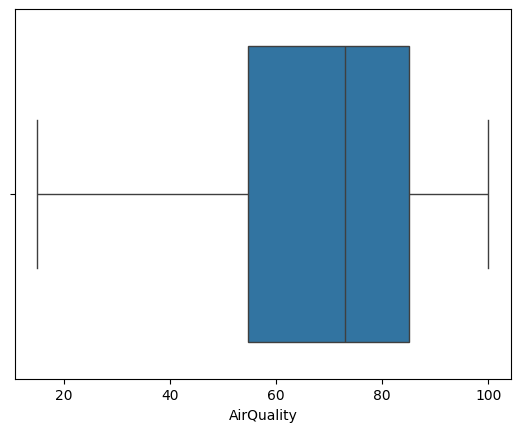

In [55]:
#create boxplot for air quality
sns.boxplot(x=df_private_outdoor_space['AirQuality'])
plt.show()

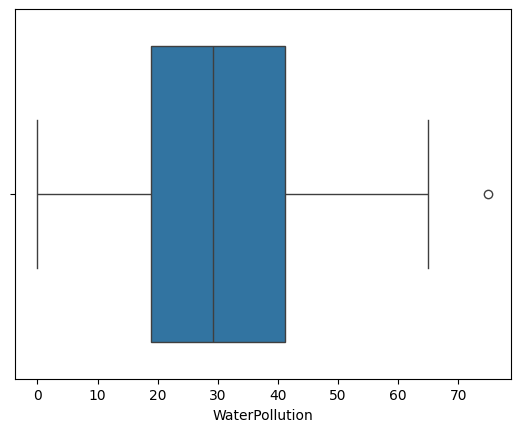

In [38]:
#create boxplot for water pollution
sns.boxplot(x=df_private_outdoor_space['WaterPollution'])
plt.show()

In [40]:
#drop the outlier
df_private_outdoor_space = df_private_outdoor_space .drop(df_private_outdoor_space [df_private_outdoor_space ['WaterPollution'] > 70].index)

<Axes: >

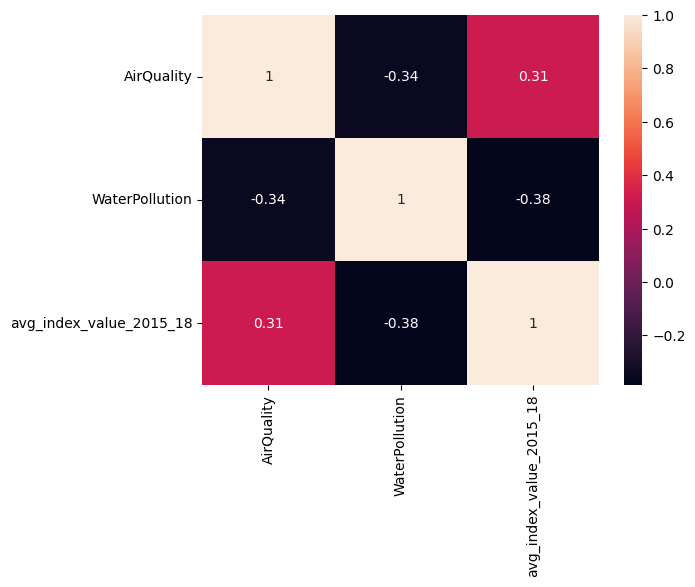

In [41]:
#create df_correlation
df_correlation=df_private_outdoor_space[['AirQuality', 'WaterPollution', 'avg_index_value_2015_18']]

# display correlation matrix
sns.heatmap( df_correlation.corr(), annot=True)


# Health indicator - Road safety

In [42]:
#creating df for road safety
df_road_safety = df[(df.Indicator_grouping_name == "Road safety")]


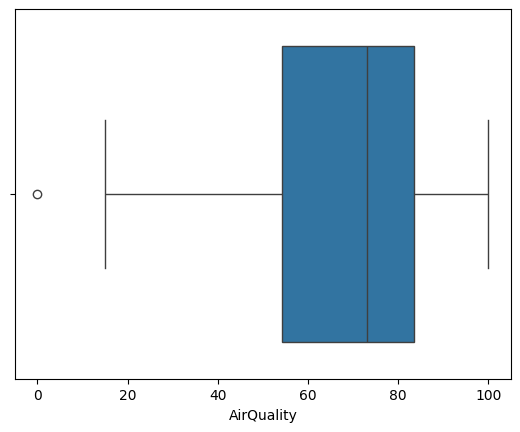

In [43]:
#create boxplot for air quality
sns.boxplot(x=df_road_safety ['AirQuality'])
plt.show()

In [44]:
#drop the outlier
df_road_safety = df_road_safety.drop(df_road_safety [df_road_safety ['AirQuality'] == 0].index)

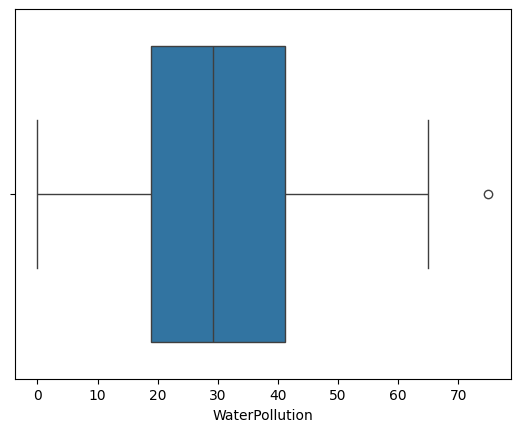

In [46]:
#create boxplot for water pollution
sns.boxplot(x=df_road_safety ['WaterPollution'])
plt.show()

In [47]:
#drop the outlier
df_road_safety = df_road_safety.drop(df_road_safety [df_road_safety ['WaterPollution'] > 70].index)

<Axes: >

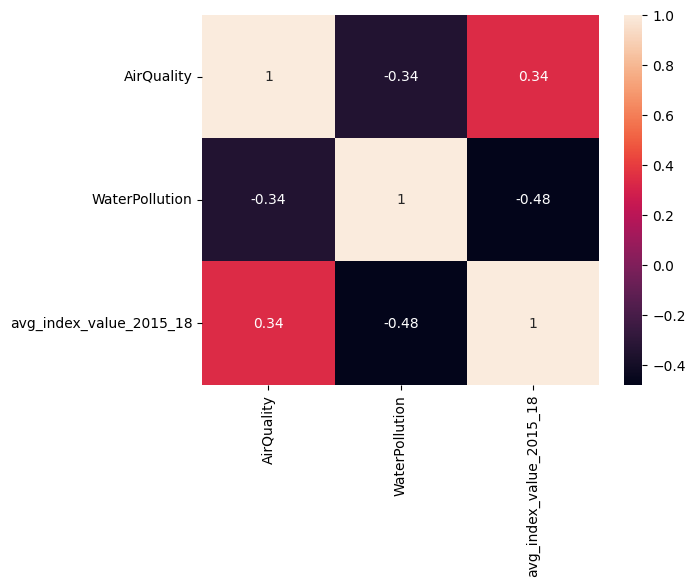

In [49]:
#create df_correlation
df_correlation=df_road_safety[['AirQuality', 'WaterPollution', 'avg_index_value_2015_18']]

# display correlation matrix
sns.heatmap( df_correlation.corr(), annot=True)

# Health indicator - Access to housing

In [50]:
#creating df for access to housing
df_access_housing= df[(df.Indicator_grouping_name == "Access to housing")]

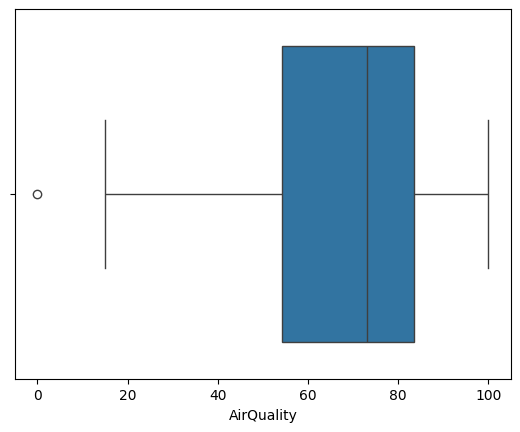

In [57]:
#create boxplot for air quality
sns.boxplot(x=df_access_housing ['AirQuality'])
plt.show()

In [75]:
#drop the outlier
df_access_housing = df_access_housing.drop(df_access_housing [df_access_housing ['AirQuality'] == 0].index)

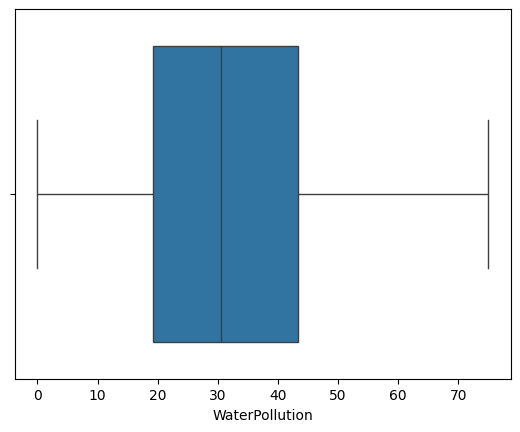

In [59]:
#create boxplot for water pollution
sns.boxplot(x=df_access_housing ['WaterPollution'])
plt.show()

<Axes: >

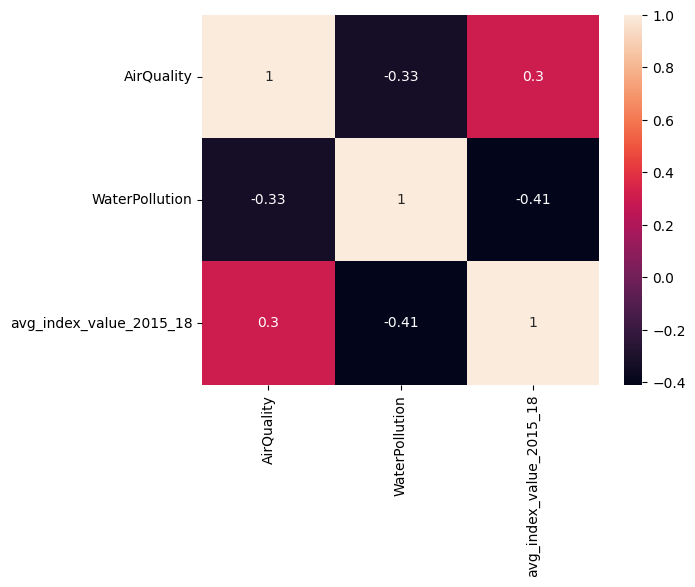

In [60]:
#create df_correlation
df_correlation=df_access_housing[['AirQuality', 'WaterPollution', 'avg_index_value_2015_18']]

# display correlation matrix
sns.heatmap( df_correlation.corr(), annot=True)

# Health indicator - Local environment

In [61]:
#creating df for local environment
df_local_environment= df[(df.Indicator_grouping_name == "Local enviroment")]

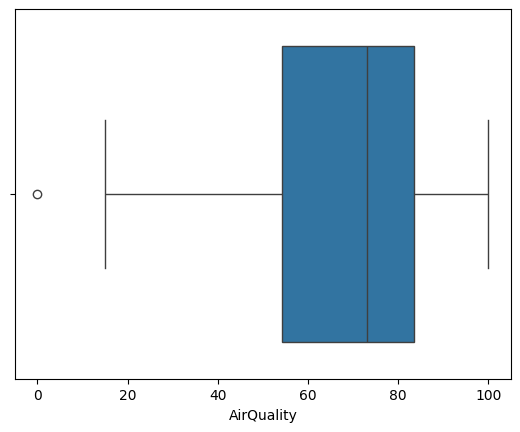

In [63]:
#create boxplot for air quality
sns.boxplot(x=df_local_environment ['AirQuality'])
plt.show()

In [77]:
#drop the outlier
df_local_environment = df_local_environment.drop(df_local_environment [df_local_environment ['AirQuality'] == 0].index)

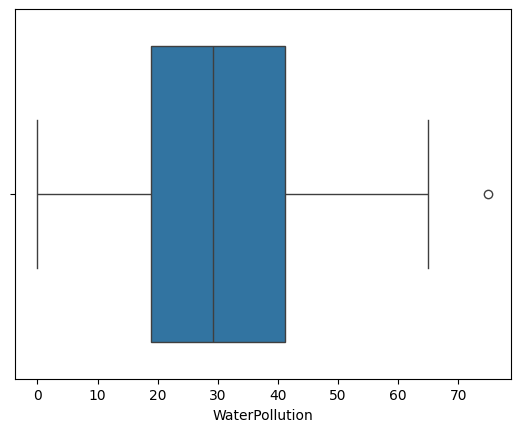

In [78]:
#create boxplot for water pollution
sns.boxplot(x=df_local_environment ['WaterPollution'])
plt.show()

In [79]:
#drop the outlier
df_local_environment = df_local_environment.drop(df_local_environment [df_local_environment ['WaterPollution'] > 70].index)

<Axes: >

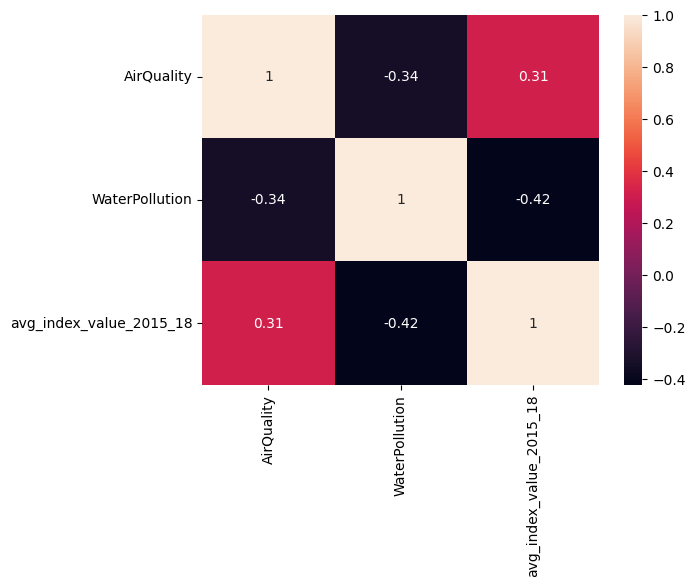

In [80]:
#create df_correlation
df_correlation=df_local_environment[['AirQuality', 'WaterPollution', 'avg_index_value_2015_18']]

# display correlation matrix
sns.heatmap( df_correlation.corr(), annot=True)

# Health indicator - Vaccination coverage

In [70]:
#creating df for vaccine
df_vaccine= df[(df.Indicator_grouping_name == "Vaccination coverage")]

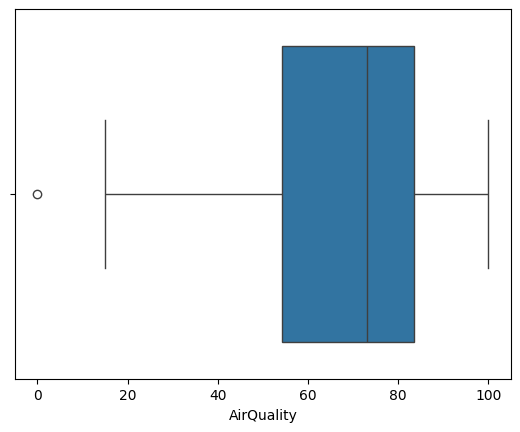

In [71]:
#create boxplot for air quality
sns.boxplot(x=df_vaccine ['AirQuality'])
plt.show()

In [81]:
#drop the outlier
df_vaccine = df_vaccine.drop(df_vaccine [df_vaccine ['AirQuality'] == 0].index)

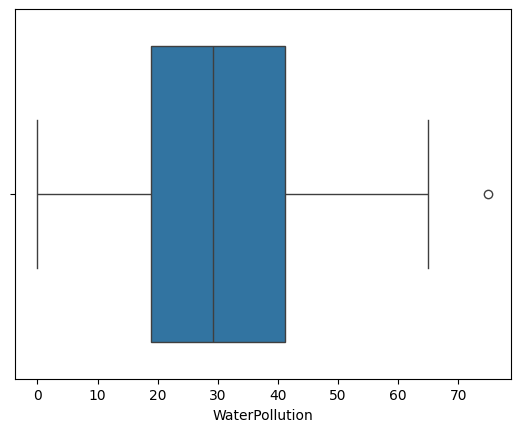

In [89]:
#create boxplot for water pollution
sns.boxplot(x=df_vaccine ['WaterPollution'])
plt.show()

In [90]:
#drop the outlier
df_vaccine = df_vaccine.drop(df_vaccine [df_vaccine ['WaterPollution'] > 70].index)

<Axes: >

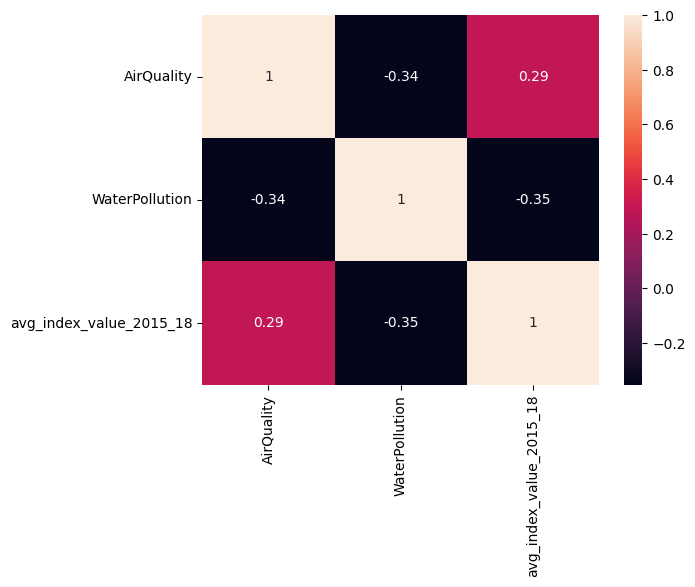

In [91]:
#create df_correlation
df_correlation=df_vaccine[['AirQuality', 'WaterPollution', 'avg_index_value_2015_18']]

# display correlation matrix
sns.heatmap( df_correlation.corr(), annot=True)

# Health indicator - Rough sleeping

In [92]:
#creating df for rough sleeping
df_rough_sleeping= df[(df.Indicator_grouping_name == "Rough sleeping")]

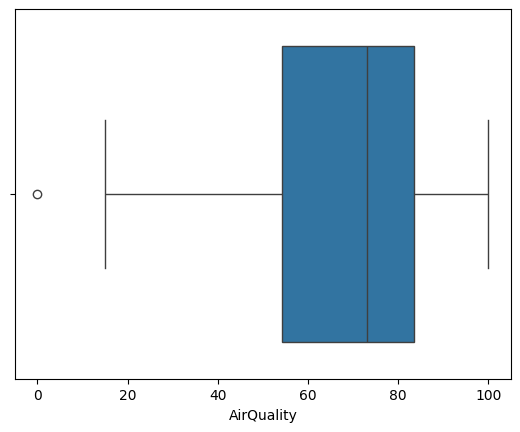

In [93]:
#create boxplot for air quality
sns.boxplot(x=df_rough_sleeping ['AirQuality'])
plt.show()

In [94]:
#drop the outlier
df_rough_sleeping = df_rough_sleeping.drop(df_rough_sleeping[df_rough_sleeping ['AirQuality'] == 0].index)

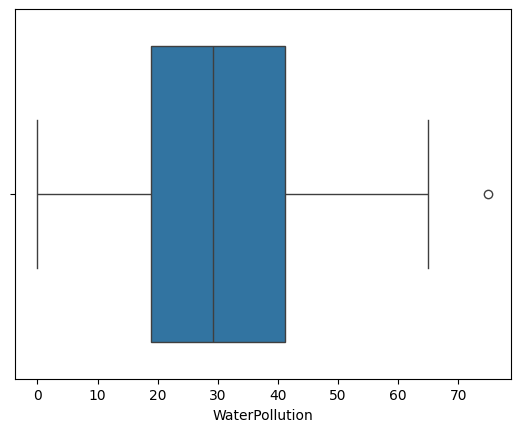

In [95]:
#create boxplot for water pollution
sns.boxplot(x=df_rough_sleeping ['WaterPollution'])
plt.show()

In [96]:
#drop the outlier
df_rough_sleeping = df_rough_sleeping.drop(df_rough_sleeping [df_rough_sleeping ['WaterPollution'] > 70].index)

<Axes: >

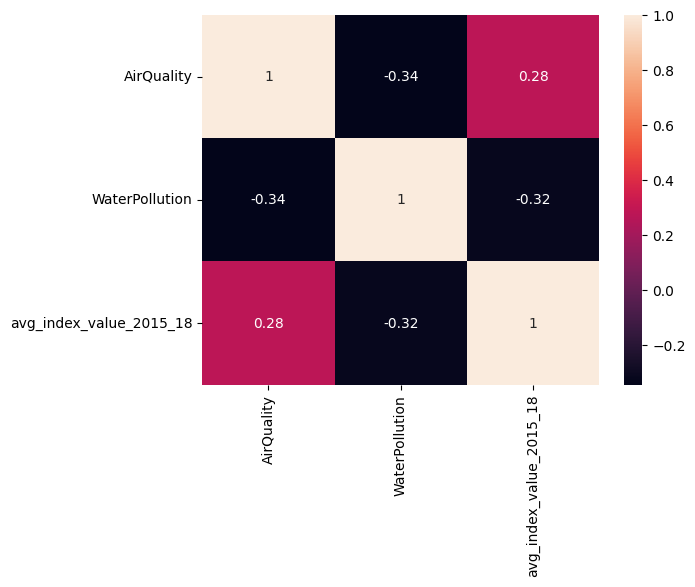

In [98]:
#create df_correlation
df_correlation=df_rough_sleeping[['AirQuality', 'WaterPollution', 'avg_index_value_2015_18']]

# display correlation matrix
sns.heatmap( df_correlation.corr(), annot=True)